In [ ]:
#This is an updated version of the assignment. I use dataset that contains Spotify top 200 charts data
#for the years of 2020 and 2021. I hope to observe trends and listeners' preferences in songs through audio features.



In [196]:
import pandas as pd




In [197]:
pd.options.display.max_rows = 100

In [198]:
df = pd.read_csv('./spotify_dataset.csv', delimiter=",", encoding='utf-8')
df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [118]:
#Firstly, I am going to look at what kind of columns are in the dataset.
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [119]:
#I am also going to check data types inside the dataset
df.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [199]:
#Audio features that I am interested in are in object type. In order to do the data exploration and analysis
#I need to convert object type to numeric type.
objects = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']
for object in objects:
    df[object] = pd.to_numeric(df[object], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   object 
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1556 non-null   object 
 9   Genre                      1556 non-null   object 
 10  Release Date               1556 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [200]:
#As I am interested in listeners' preferences, I am going to look at 'Number of Times Charted'. This will help me
#to see which songs were in heavy rotation which in turn indicates that they were favoured by listeners.
#I chose to look at the top 20 of the most charted songs.
most_charted=df.sort_values('Number of Times Charted', ascending=False)[:20]
most_charted

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
368,369,5,142,2019-12-27--2020-01-03,Falling,"5,294,368",Harry Styles,16112621.0,1ZMiCix7XSAbfAJlEZWMCp,"['pop', 'post-teen pop']",...,0.567,0.267,-6.502,0.0299,0.83900,0.0890,110.011,240133.0,0.0592,E
92,93,6,84,2019-12-27--2020-01-03,Circles,"7,156,162",Post Malone,33651775.0,21jGcNKet2qwijlDFuPiPb,"['dfw rap', 'melodic rap', 'rap']",...,0.695,0.762,-3.497,0.0395,0.19200,0.0863,120.042,215280.0,0.5530,C
117,118,9,83,2019-12-27--2020-01-03,Señorita,"6,317,487","Shawn Mendes, Camila Cabello",33879560.0,0TK2YIli7K1leLovkQiNik,"['canadian pop', 'dance pop', 'pop', 'post-tee...",...,0.759,0.540,-6.039,0.0287,0.03700,0.0945,116.947,190960.0,0.7500,A
110,111,46,83,2020-04-17--2020-04-24,lovely (with Khalid),"6,569,547",Billie Eilish,47014200.0,0u2P5u6lvoDfwTYjAADbn4,"['electropop', 'pop']",...,0.351,0.296,-10.109,0.0333,0.93400,0.0950,115.284,200186.0,0.1200,E
34,35,4,83,2020-07-31--2020-08-07,Watermelon Sugar,"11,996,689",Harry Styles,16112621.0,6UelLqGlWMcVH1E5c4H7lY,"['pop', 'post-teen pop']",...,0.548,0.816,-4.209,0.0465,0.12200,0.3350,95.390,174000.0,0.5570,C
65,66,2,83,2020-03-27--2020-04-03,Don't Start Now,"8,821,971",Dua Lipa,1250353.0,7njGslFmqBmOSSOpTyZCs9,[],...,0.793,0.793,-4.521,0.0830,0.01230,0.0951,123.950,183290.0,0.6790,B
147,148,59,83,2020-01-03--2020-01-10,Shallow,"5,672,480","Lady Gaga, Bradley Cooper",18572085.0,2VxeLyX666F8uXCJ0dZF8B,"['dance pop', 'pop', 'post-teen pop']",...,0.572,0.385,-6.362,0.0308,0.37100,0.2310,95.799,215733.0,0.3230,G
69,70,12,83,2019-12-27--2020-01-03,Someone You Loved,"8,490,162",Lewis Capaldi,8384096.0,7qEHsqek33rTcFNT9PFqLf,"['pop', 'uk pop']",...,0.501,0.405,-5.679,0.0319,0.75100,0.1050,109.891,182161.0,0.4460,C#/Db
111,112,24,83,2019-12-27--2020-01-03,Sunflower - Spider-Man: Into the Spider-Verse,"6,546,948","Post Malone, Swae Lee",1250353.0,3KkXRkHbMCARz0aVfEt68P,[],...,0.760,0.479,-5.574,0.0466,0.55600,0.0703,89.911,158040.0,0.9130,D
144,145,13,83,2020-04-24--2020-05-01,goosebumps,"5,691,540",Travis Scott,17719446.0,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",...,0.841,0.593,-7.846,0.0379,0.41800,0.1240,124.917,162803.0,0.8080,C#/Db


<AxesSubplot:xlabel='Song Name'>

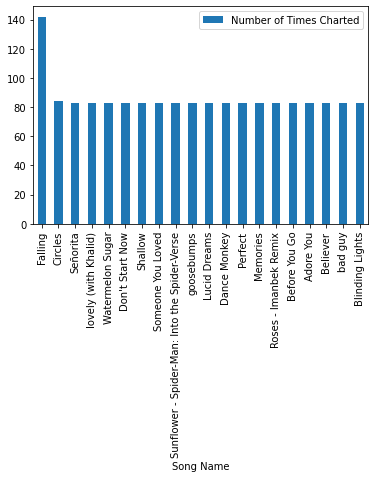

In [201]:
most_charted.plot.bar(x='Song Name', y='Number of Times Charted')

In [113]:
#The most charted song is "Falling", here is some extra information about it(I also love this song!). 
df.loc[df['Song Name'] == 'Falling']

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
368,369,5,142,2019-12-27--2020-01-03,Falling,"5,294,368",Harry Styles,16112621,1ZMiCix7XSAbfAJlEZWMCp,"['pop', 'post-teen pop']",...,0.567,0.267,-6.502,0.0299,0.839,0.089,110.011,240133,0.0592,E


<AxesSubplot:xlabel='Song Name'>

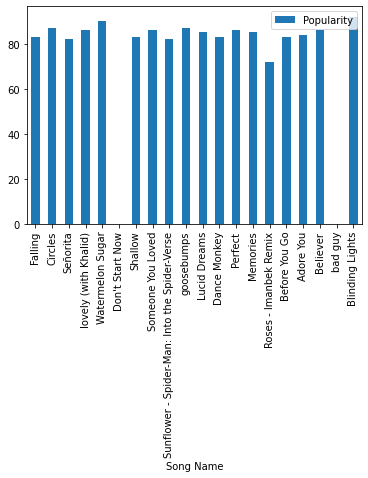

In [126]:
#interestingly,it seems that the most frequent charting songs are not the most popular. Harry Styles's "Falling" 
#which is the top most charted song, is not as popular as Harry Styles's "Watermelon Sugar".
most_charted.plot.bar(x='Song Name', y='Popularity')


0.64955

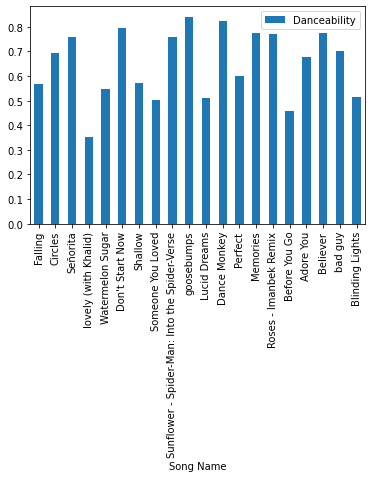

In [194]:
#Now I'd like to explore audio features of the most frequently charted songs. 
#I use Spotify API description of each feature for better understanding. 
# Danceability: A value of 0.0 is least danceable and 1.0 is most danceable.
most_charted.plot.bar(x='Song Name',y='Danceability')
most_charted["Danceability"].mean()
#The overall trend seems to lean more towards danceable music. 


0.5632500000000001

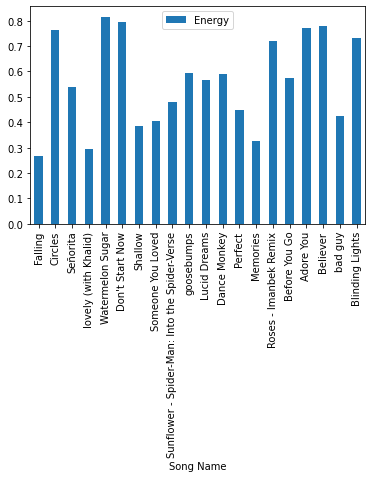

In [195]:
#Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
most_charted.plot.bar(x='Song Name', y='Energy')
most_charted["Energy"].mean()


-6.13995

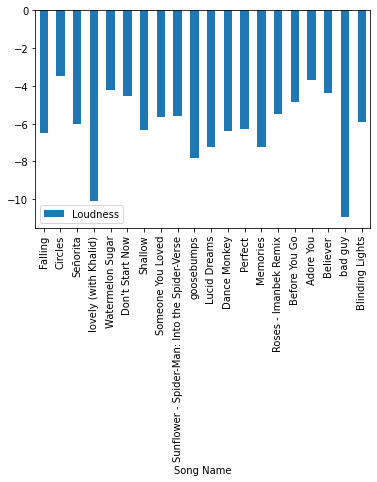

In [182]:
#Values typically range between -60 and 0 db.
most_charted.plot.bar(x='Song Name', y='Loudness')
most_charted["Loudness"].mean()
#The overall preference leans towards a louder music. Two exeptions here are songs by Billie Eilish(bad guy, lovely)

0.07476000000000001

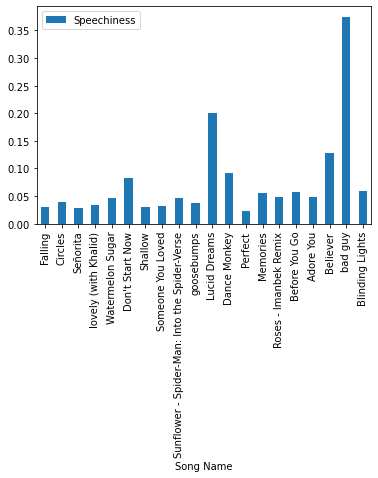

In [181]:
#value below 0.33 most likely represent music and other non-speech-like tracks. Value above 0.33 describes
#both music and speech and most probably would represent rap music.
most_charted.plot.bar(x='Song Name', y='Speechiness')
most_charted["Speechiness"].mean()
#Here it is clear that the preference is towards music, less speech like songs. 

0.36554800000000004

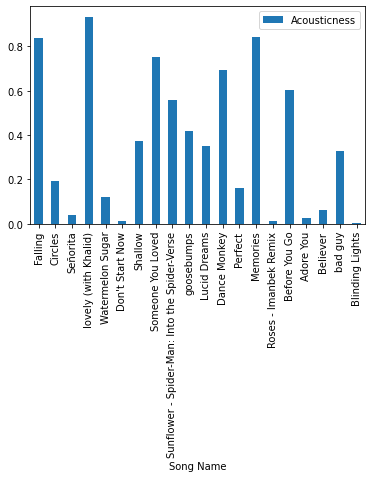

In [180]:
#A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
most_charted.plot.bar(x='Song Name', y='Acousticness')
most_charted["Acousticness"].mean()

0.141125

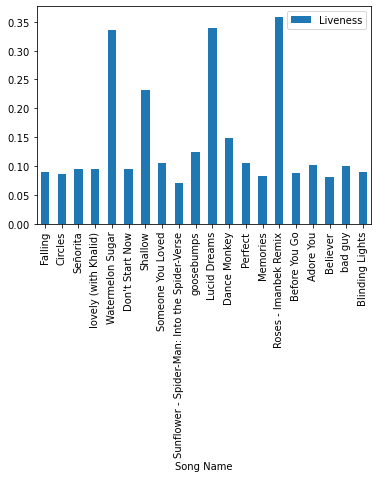

In [175]:
#A value above 0.8 provides strong likelihood that the track is live.
most_charted.plot.bar(x='Song Name', y='Liveness')
most_charted["Liveness"].mean()
#It shows an abcense of live tracks.

111.70689999999999

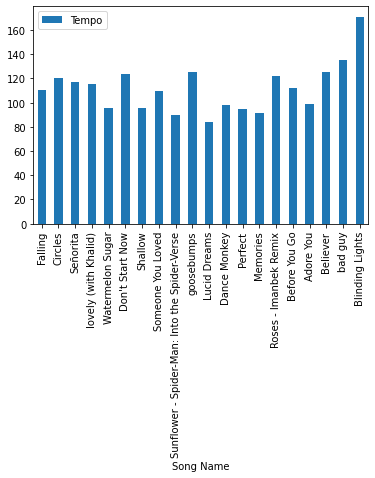

In [176]:
#It looks like moderate tempo is the most popular((108–120 BPM))
most_charted.plot.bar(x='Song Name', y='Tempo')
most_charted["Tempo"].mean()

0.49395999999999995

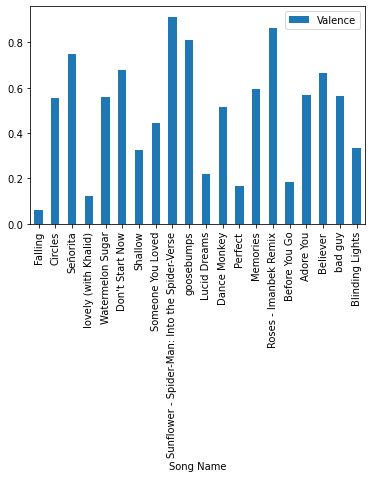

In [177]:
#A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
most_charted.plot.bar(x='Song Name', y='Valence')
most_charted["Valence"].mean()

In [ ]:
#From my observations, based on audio features of the songs, that charted most frequently,
#I can conclude that listeners' preference lies towards: studio-recorded, loud, of moderate tempo 
# and intensity, not-to-upbeat songs with less or no-speech-like qualities. 
#For the future research, it would be interesting to see if it is possible to predict which songs can 
#potentially chart based on audio features and listeners' music preferences.